# SEABORN

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## 1 - Visualisation des notes des étudiants

- Chargez le fichier `student_grades.csv` dans un DataFrame nommé `grades_df`.
- Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.

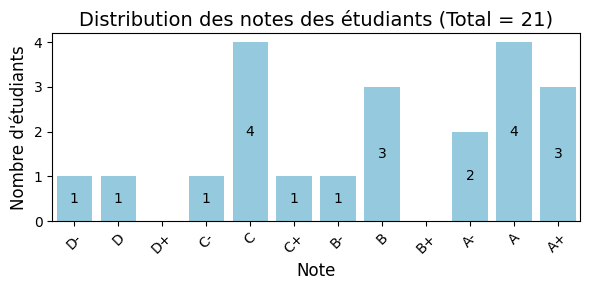

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier contenant les notes des étudiants
fichier_grades = './data/student_grades.csv'
grades_df = pd.read_csv(fichier_grades, names=['ID', 'salle', 'note'])

# Définir l'ordre des notes académiques
ordre_notes = ['D-', 'D', 'D+', 
               'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']

# Créer le graphique de type countplot pour visualiser la distribution des notes
plt.figure(figsize=(6,3))
ax = sns.countplot(data=grades_df, x='note', order=ordre_notes, color='skyblue')

# Ajouter le nombre d'étudiants au centre de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, int(bar.get_height()), ha='center', va='center')

# Ajouter titre et labels
plt.title(f"Distribution des notes des étudiants (Total = {grades_df.shape[0]})", fontsize=14)
plt.xlabel("Note", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2 - Comparaison des notes en fonction des salles

- Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.

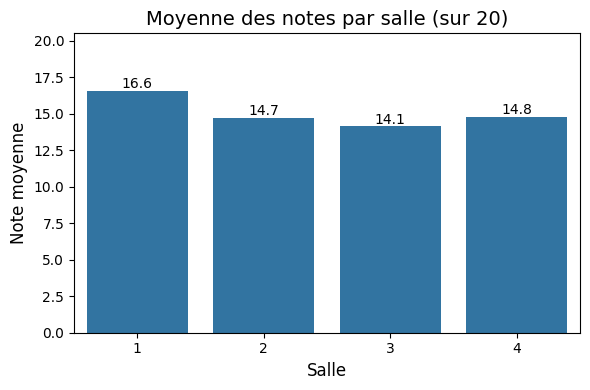

In [128]:
# Définir la correspondance des notes
conversion_notes = {
    'F-': 0, 'F': 1, 'F+': 2,
    'E-': 3, 'E': 4, 'E+': 5,
    'D-': 6, 'D': 7, 'D+': 8,
    'C-': 9, 'C': 10, 'C+': 11,
    'B-': 12, 'B': 13, 'B+': 14,
    'A-': 15, 'A': 16, 'A+': 17
}

# Créer la colonne note_dec avec les nombres correspondant
grades_df['note_dec'] = grades_df['note'].map(conversion_notes)

# Normaliser sur 20
grades_df['note_sur_20'] = grades_df['note_dec'] * 20 / 17
grades_df['note_sur_20'] = grades_df['note_sur_20'].apply(lambda x: round(x * 2) / 2)

# Calculer la moyenne des notes sur 20 par salle
moyennes_par_salle = grades_df.groupby('salle')['note_sur_20'].mean().reset_index()

# Créer le graphique à barres
plt.figure(figsize=(6,4))
ax = sns.barplot(data=moyennes_par_salle, x='salle', y='note_sur_20')

# Ajouter la valeur moyenne au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, f"{bar.get_height():.1f}", ha='center')

# Ajouter titre et labels
plt.title("Moyenne des notes par salle (sur 20)", fontsize=14)
plt.xlabel("Salle", fontsize=12)
plt.ylabel("Note moyenne", fontsize=12)
plt.ylim(0, 20.5)  # Ajuster l'axe y pour inclure 20
plt.tight_layout()
plt.show()


## 3 - Comparaison des notes en fonction du statut de réussite

- Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.

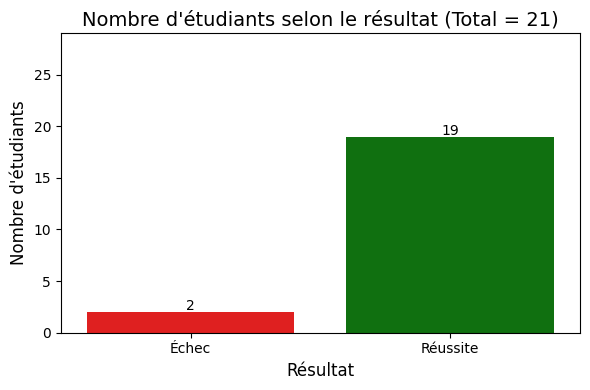

In [129]:
grades_df['result'] = grades_df['note_sur_20'].apply(lambda x: "Réussite" if x >= 10 else "Échec")

# Compter le nombre d'étudiants par résultat
result_counts = grades_df['result'].value_counts().reindex(['Échec', 'Réussite']).reset_index()
result_counts.columns = ['resultat', 'nombre']

# Créer le graphique à barres
plt.figure(figsize=(6,4))
ax = sns.barplot(data=result_counts, x='resultat', y='nombre', hue='resultat', palette=['red', 'green'])

# Ajouter le nombre au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, int(bar.get_height()), ha='center')

# Ajouter titre et labels
plt.title(f"Nombre d'étudiants selon le résultat (Total = {grades_df.shape[0]})", fontsize=14)
plt.xlabel("Résultat", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.ylim(0, result_counts['nombre'].max() + 10)
plt.tight_layout()
plt.show()

## 4 - Visualisation de la corrélation entre les variables

- Chargez le fichier `titanic.csv` dans un DataFrame nommé `titanic_df`.
- Utilisez Seaborn pour créer une matrice de corrélation pour les variables numériques du DataFrame `titanic_df`.

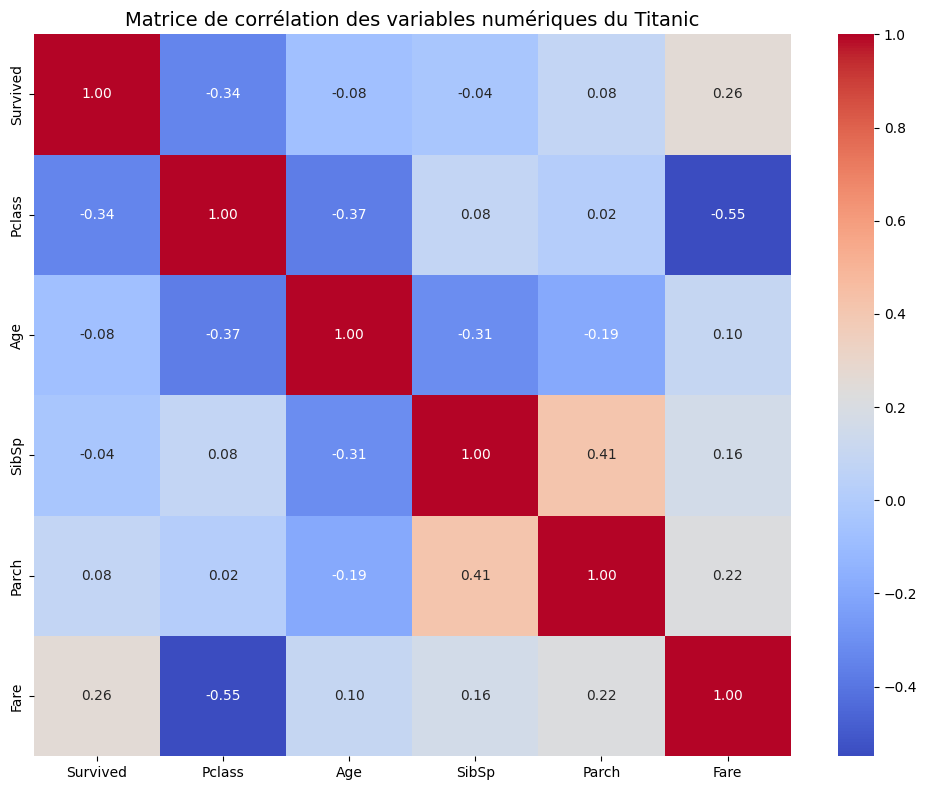

In [130]:
# Charger le fichier des passagers du titanic
fichier_titanic = './data/titanic.csv'
titanic_df = pd.read_csv(fichier_titanic)

# Sélectionner uniquement les colonnes numériques pertinentes
titanic_df_numeric = titanic_df[['Survived','Pclass','Age','SibSp','Parch','Fare']]

# Calculer la matrice de corrélation
corr_matrix = titanic_df_numeric.corr()

# Créer la heatmap de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des variables numériques du Titanic", fontsize=14)
plt.tight_layout()
plt.show()

## 5 - Comparaison des tarifs en fonction du statut de survie

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte (boxplot) montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survit ou non).

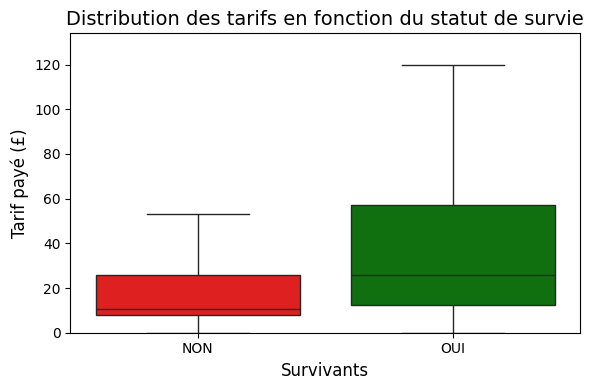

In [131]:
# Ajouter une colonne avec des labels textuels
titanic_df['Survived_label'] = titanic_df['Survived'].map({0: "NON", 1: "OUI"})

# Créer le graphique boxplot des tarifs selon le statut de survie
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=titanic_df, x='Survived_label', y='Fare', hue='Survived_label', palette={"NON":'red', "OUI":'green'}, showfliers=False)

# Ajouter titre et labels
plt.title("Distribution des tarifs en fonction du statut de survie", fontsize=14)
plt.xlabel("Survivants", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)
plt.ylim(0, titanic_df['Fare'].quantile(0.96))  # Limite pour exclure les valeurs extrêmes extrêmes
plt.tight_layout()
plt.show()


## 6 - Visualisation des âges des passagers

- Utilisez le DataFrame `titanic_df` pour créer un histogramme représentant la distribution des âges des passagers.

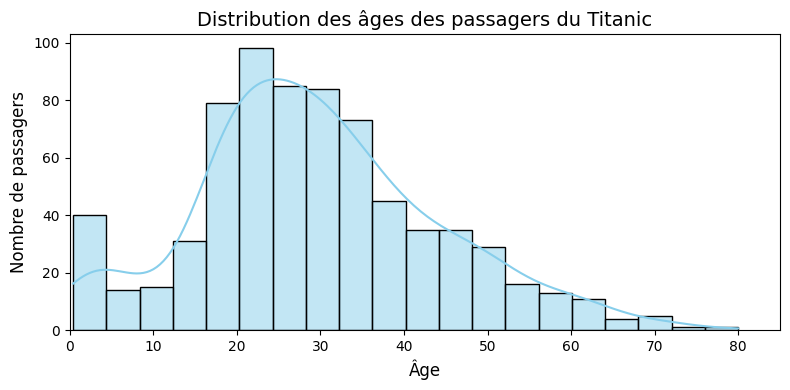

In [132]:
# Créer l'histogramme des âges
plt.figure(figsize=(8,4))
ax = sns.histplot(data=titanic_df, x='Age', bins=20, kde=True, color='skyblue')

# Ajouter titre et labels
plt.title("Distribution des âges des passagers du Titanic", fontsize=14)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.xlim(0, titanic_df['Age'].max() + 5)  # Ajuster l'axe x pour inclure tous les âges
plt.tight_layout()
plt.show()

## 7 - Comparaison des âges en fonction du statut de survie

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction de leur statut de survie.

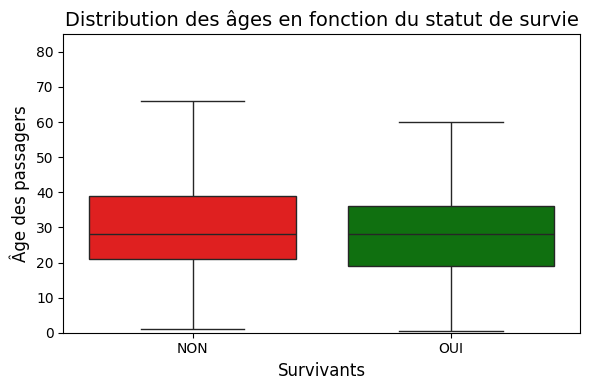

In [133]:
# Créer le boxplot des âges selon le statut de survie
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=titanic_df, x='Survived_label', y='Age', hue='Survived_label', 
                 palette={"NON": 'red', "OUI": 'green'}, showfliers=False)

# Ajouter titre et labels
plt.title("Distribution des âges en fonction du statut de survie", fontsize=14)
plt.xlabel("Survivants", fontsize=12)
plt.ylabel("Âge des passagers", fontsize=12)
plt.ylim(0, titanic_df['Age'].max() + 5)  # Ajuster l'axe y pour inclure tous les âges
plt.tight_layout()
plt.show()

## 8 - Visualisation de la répartition des tarifs

- Utilisez le DataFrame `titanic_df` pour créer un histogramme représentant la répartition des tarifs payés par les passagers.

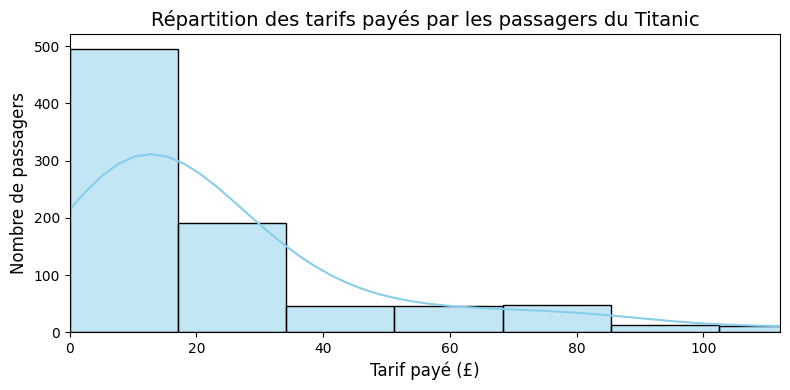

In [134]:
# Créer l'histogramme des tarifs
plt.figure(figsize=(8,4))
ax = sns.histplot(data=titanic_df, x='Fare', bins=30, kde=True, color='skyblue')

# Ajouter titre et labels
plt.title("Répartition des tarifs payés par les passagers du Titanic", fontsize=14)
plt.xlabel("Tarif payé (£)", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)

# Limiter l'axe x pour exclure les valeurs extrêmes (optionnel)
plt.xlim(0, titanic_df['Fare'].quantile(0.95))

plt.tight_layout()
plt.show()


## 9 - Comparaison des tarifs en fonction de la classe

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur classe (1ère, 2ème ou 3ème classe).

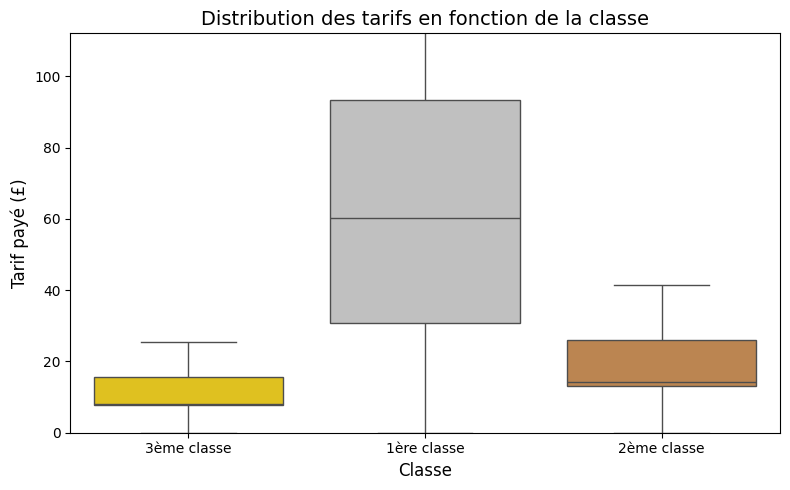

In [135]:
# Créer une colonne avec des labels textuels pour les classes
titanic_df['Pclass_label'] = titanic_df['Pclass'].map({1: "1ère classe", 2: "2ème classe", 3: "3ème classe"})

# Créer le boxplot des tarifs selon la classe
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=titanic_df, x='Pclass_label', y='Fare', hue='Pclass_label', palette=["gold", "silver", "peru"], showfliers=False)

# Ajouter titre et labels
plt.title("Distribution des tarifs en fonction de la classe", fontsize=14)
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)

# Limiter l'axe y pour exclure les valeurs extrêmes
plt.ylim(0, titanic_df['Fare'].quantile(0.95))

plt.tight_layout()
plt.show()


## 10 - Visualisation de la répartition du genre des passagers

- Utilisation du DataFrame `titanic_df` pour créer un histogramme représentant la répartition des genres.

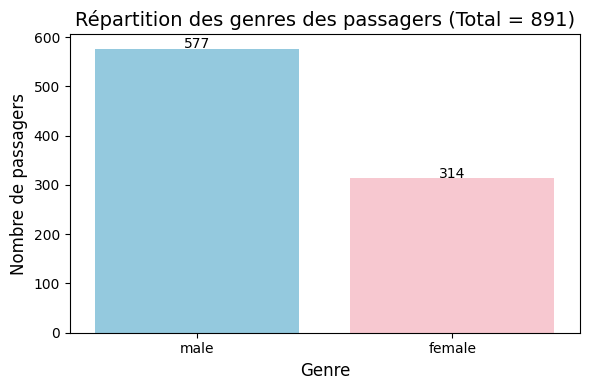

In [136]:
# Créer un histogramme pour la répartition du genre
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_df, x='Sex', hue='Sex', palette=['skyblue', 'pink'])

# Ajouter le nombre de passagers au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, int(bar.get_height()), ha='center')

# Ajouter titre et labels
plt.title(f"Répartition des genres des passagers (Total = {titanic_df.shape[0]})", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.tight_layout()
plt.show()


## 11 - Comparaison des âges des étudiants en fonction du statut de réussite

- Chargez le fichier `sales_data.csv` dans un DataFrame nommé `sales_df`.
- Affichez les 10 premières lignes du DataFrame pour visualiser les données.
- Calculez le chiffre d'affaires total réalisé sur l'ensemble des transactions.
- Tracez un graphique à barres montrant les 5 produits les plus vendus (en termes de quantité) avec le nom du produit sur l'axe des x et la quantité vendue sur l'axe des y.

### 10 premières lignes du dataset

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


**Chiffre d'affaires total :** 95176318.00 €

### Top 5 des produits les plus vendus

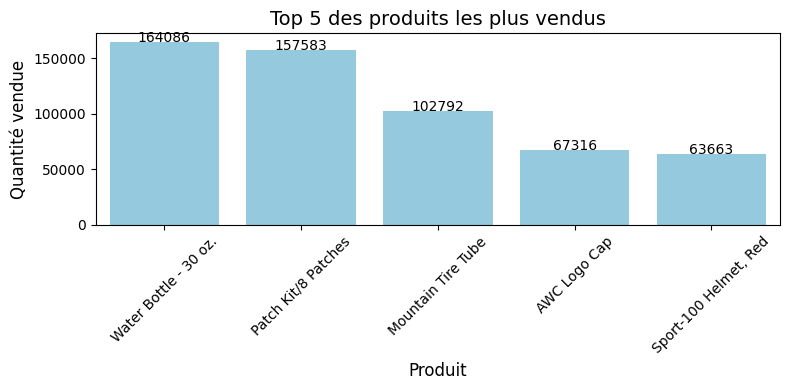

In [137]:
# Charger le fichier sales_data.csv
fichier_sales = './data/sales_data.csv'
sales_df = pd.read_csv(fichier_sales)

# Afficher les 10 premières lignes
display(Markdown("### 10 premières lignes du dataset"))
display(sales_df.head(10))

# Calculer le chiffre d’affaires total
sales_df['total_price'] = sales_df['Order_Quantity'] * sales_df['Unit_Price']
chiffre_affaires_total = sales_df['total_price'].sum()
display(Markdown(f"**Chiffre d'affaires total :** {chiffre_affaires_total:.2f} €"))

# Trouver les 5 produits les plus vendus (en quantité)
top5_produits = sales_df.groupby('Product')['Order_Quantity'].sum().sort_values(ascending=False).head(5).reset_index()

# Tracer le graphique à barres
display(Markdown("### Top 5 des produits les plus vendus"))
plt.figure(figsize=(8,4))
ax = sns.barplot(data=top5_produits, x='Product', y='Order_Quantity', color='skyblue')

# Ajouter les quantités au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, int(bar.get_height()), ha='center')

plt.title("Top 5 des produits les plus vendus", fontsize=14)
plt.xlabel("Produit", fontsize=12)
plt.ylabel("Quantité vendue", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 12 - Visualisation de la répartition des notes des étudiants

- Utilisez le DataFrame `grades_df` pour créer un histogramme représentant la répartition des notes des étudiants.

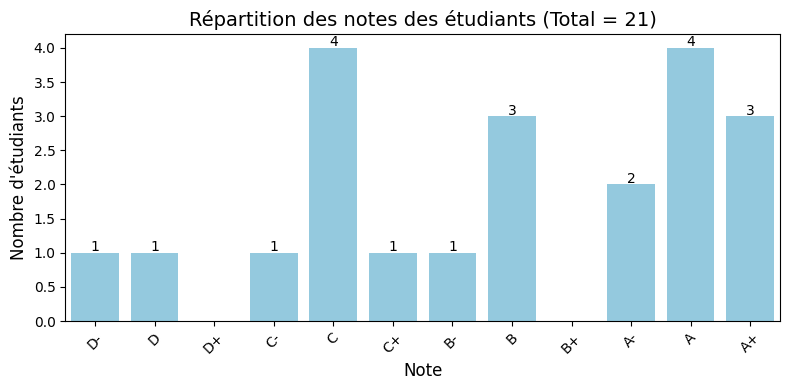

In [138]:
# Définir l'ordre des notes académiques si ce n'est pas déjà fait
ordre_notes = ['D-', 'D', 'D+', 
               'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']

# Créer le graphique de type countplot
plt.figure(figsize=(8,4))
ax = sns.countplot(data=grades_df, x='note', order=ordre_notes, color='skyblue')

# Ajouter le nombre d'étudiants au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.025, int(bar.get_height()), ha='center')

# Ajouter titre et labels
plt.title(f"Répartition des notes des étudiants (Total = {grades_df.shape[0]})", fontsize=14)
plt.xlabel("Note", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 13 - Comparaison des notes des étudiants en fonction de la salle

- Utilisez le DataFrame `grades_df` pour créer un graphique en boîte montrant la distribution des notes des étudiants en fonction de la salle.

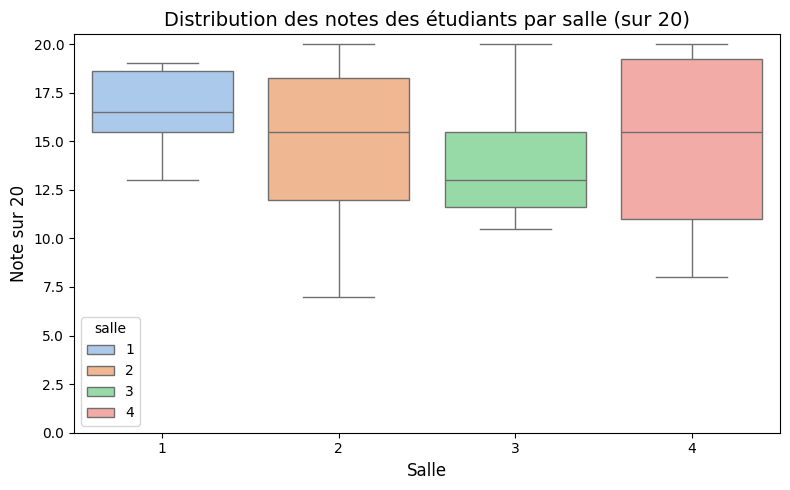

In [139]:
# Créer le boxplot des notes selon la salle
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=grades_df, x='salle', y='note_sur_20', hue='salle', palette="pastel", showfliers=False)

# Ajouter le titre et les labels
plt.title("Distribution des notes des étudiants par salle (sur 20)", fontsize=14)
plt.xlabel("Salle", fontsize=12)
plt.ylabel("Note sur 20", fontsize=12)
plt.ylim(0, 20.5)  # Ajuster l'axe y pour inclure toutes les notes
plt.tight_layout()
plt.show()


## 14 - Visualisation des tarifs des passagers en fonction de la classe

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur classe.

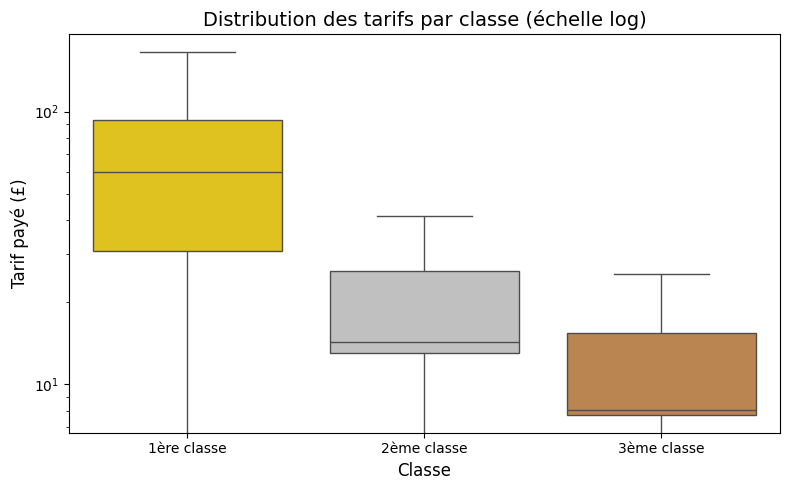

In [140]:
# Dictionnaire associant chaque classe à une couleur
Pclass_palette = {"1ère classe": "gold", "2ème classe": "silver", "3ème classe": "peru"}

# Créer la figure avec une taille adaptée
plt.figure(figsize=(8,5))

# Créer le boxplot
sns.boxplot(
    data=titanic_df,                    # DataFrame contenant les données
    x='Pclass_label',                   # Colonne pour l'axe x (classe des passagers)
    y='Fare',                           # Colonne pour l'axe y (tarif payé)
    hue='Pclass_label',                 # Colonne pour colorer les boxes
    order=list(Pclass_palette.keys()),  # Ordre des catégories sur l'axe x
    palette=Pclass_palette,             # Couleurs associées à chaque catégorie
    showfliers=False                    # Ne pas afficher les valeurs extrêmes pour plus de lisibilité
)

# Ajouter un titre et des labels aux axes
plt.title("Distribution des tarifs par classe (échelle log)", fontsize=14)
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)

# Mettre l'axe y en échelle logarithmique
plt.yscale('log')

# Ajuster automatiquement les marges pour que rien ne soit coupé
plt.tight_layout()

# Afficher le graphique
plt.show()


## 15 - Comparaison des tarifs des passagers en fonction du port d'embarquement

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).

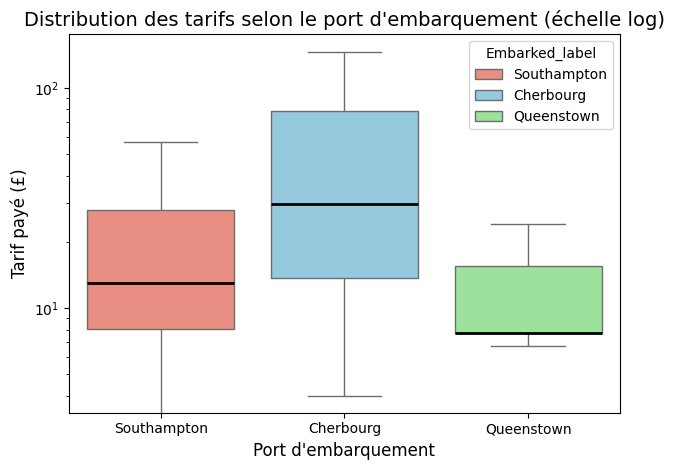

In [141]:
# Créer une colonne avec des labels lisibles pour les ports
titanic_df['Embarked_label'] = titanic_df['Embarked'].map({
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
})

# Définir une palette pour les ports d'embarquement
Embarked_palette = {
    'Cherbourg': 'skyblue',
    'Queenstown': 'lightgreen',
    'Southampton': 'salmon'
}

# Boxplot avec palette personnalisée
sns.boxplot(
    data=titanic_df,
    x='Embarked_label',
    y='Fare',
    hue='Embarked_label',
    palette=Embarked_palette,
    showfliers=False,
    medianprops={'color':'black', 'linewidth':2}
)

# Titre et labels
plt.title("Distribution des tarifs selon le port d'embarquement (échelle log)", fontsize=14)
plt.xlabel("Port d'embarquement", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)

# Échelle log pour l'axe y
plt.yscale('log')

plt.tight_layout()
plt.show()

## 16 - Visualisation de la répartition des tarifs des passagers

- Utilisez le DataFrame `titanic_df` pour créer un histogramme représentant la répartition des tarifs payés par les passagers.

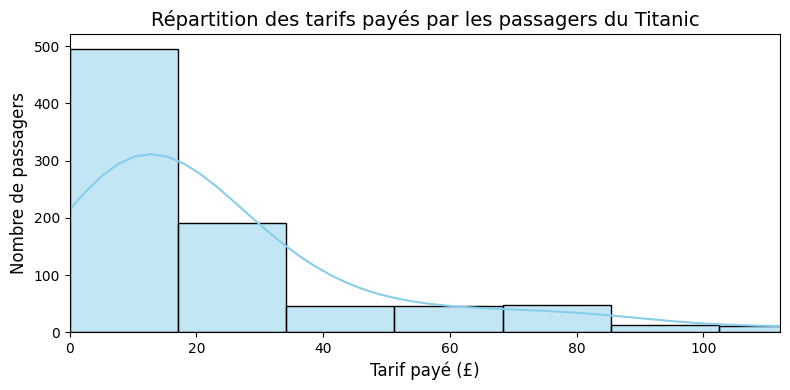

In [142]:
# Créer l'histogramme des tarifs
plt.figure(figsize=(8,4))
ax = sns.histplot(
    data=titanic_df, 
    x='Fare', 
    bins=30,         # Nombre de bins pour lisibilité
    kde=True,        # Ajouter une courbe de densité
    color='skyblue'
)

# Ajouter titre et labels
plt.title("Répartition des tarifs payés par les passagers du Titanic", fontsize=14)
plt.xlabel("Tarif payé (£)", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)

# Limiter l'axe x pour exclure les valeurs extrêmes (optionnel)
plt.xlim(0, titanic_df['Fare'].quantile(0.95))  # Affiche jusqu'au 95ème percentile

plt.tight_layout()
plt.show()


## 17 - Comparaison des tarifs des passagers en fonction du sexe

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du sexe (homme ou femme).

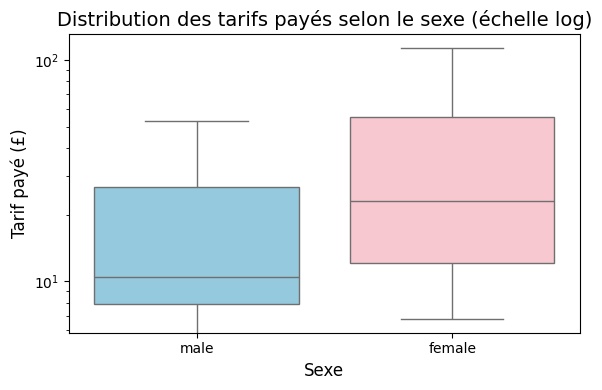

In [143]:
# Boxplot des tarifs selon le sexe avec échelle log
plt.figure(figsize=(6,4))
ax = sns.boxplot(
    data=titanic_df,
    x='Sex',
    y='Fare',
    hue='Sex',
    palette={'male':'skyblue', 'female':'pink'},
    showfliers=False  # Exclure les valeurs extrêmes
)

# Ajouter titre et labels
plt.title("Distribution des tarifs payés selon le sexe (échelle log)", fontsize=14)
plt.xlabel("Sexe", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)

# Mettre l'axe y en échelle logarithmique
plt.yscale('log')

plt.tight_layout()
plt.show()


## 18 - Visualisation des tarifs des passagers en fonction du statut de survi

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survécu ou non).

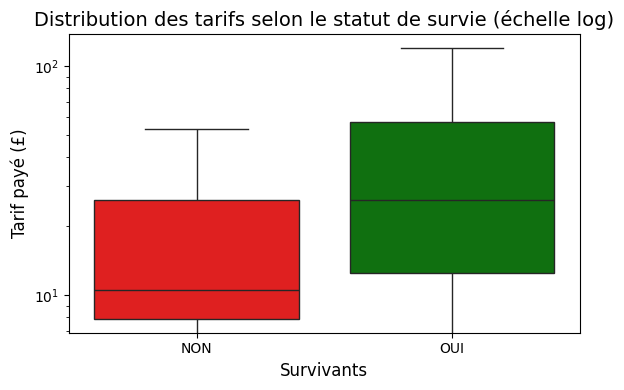

In [144]:
# Boxplot des tarifs selon le statut de survie avec échelle log
plt.figure(figsize=(6,4))
ax = sns.boxplot(
    data=titanic_df,
    x='Survived_label',       # Colonne contenant "OUI"/"NON"
    y='Fare',
    hue='Survived_label',
    palette={"NON": 'red', "OUI": 'green'},
    showfliers=False          # Exclure les valeurs extrêmes
)

# Ajouter titre et labels
plt.title("Distribution des tarifs selon le statut de survie (échelle log)", fontsize=14)
plt.xlabel("Survivants", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)

# Mettre l'axe y en échelle logarithmique pour lisibilité
plt.yscale('log')

plt.tight_layout()
plt.show()


## 19 - Comparaison des âges des passagers en fonction du port d'embarquement

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction du port d'embarquement.

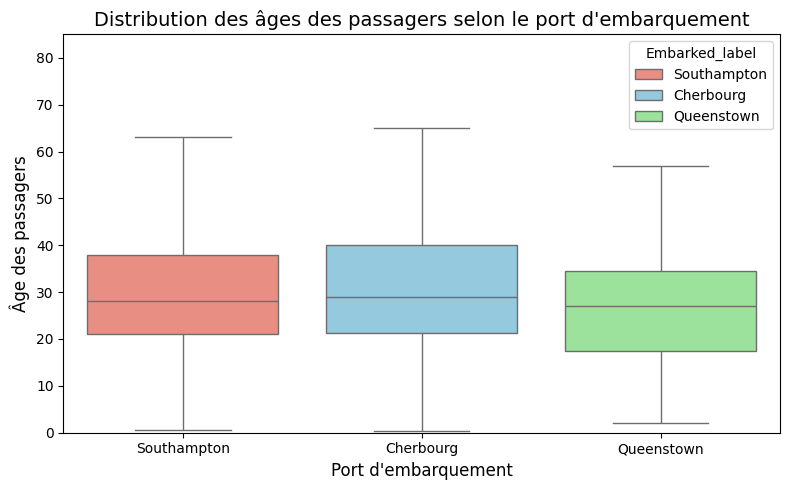

In [145]:
# Boxplot des âges selon le port d'embarquement
plt.figure(figsize=(8,5))
ax = sns.boxplot(
    data=titanic_df,
    x='Embarked_label',       # Colonne avec labels lisibles pour les ports
    y='Age',
    hue='Embarked_label',
    palette=Embarked_palette,  # Palette définie précédemment
    showfliers=False           # Exclure les valeurs extrêmes
)

# Ajouter titre et labels
plt.title("Distribution des âges des passagers selon le port d'embarquement", fontsize=14)
plt.xlabel("Port d'embarquement", fontsize=12)
plt.ylabel("Âge des passagers", fontsize=12)

# Ajuster l'axe y pour inclure tous les âges
plt.ylim(0, titanic_df['Age'].max() + 5)

plt.tight_layout()
plt.show()


## 20 - Visualisation de la répartition des âges des passagers

- Utilisez le DataFrame `titanic_df` pour créer un histogramme représentant la répartition des âges des passagers.

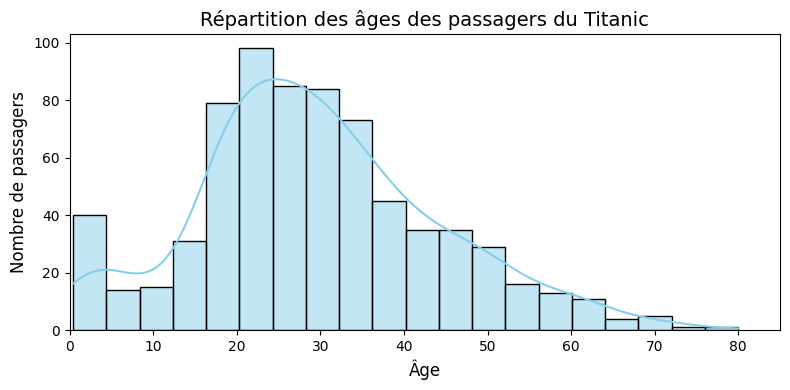

In [146]:
# Histogramme des âges des passagers
plt.figure(figsize=(8,4))
ax = sns.histplot(
    data=titanic_df, 
    x='Age', 
    bins=20,        # Nombre de bins pour la lisibilité
    kde=True,       # Affiche la courbe de densité
    color='skyblue'
)

# Ajouter titre et labels
plt.title("Répartition des âges des passagers du Titanic", fontsize=14)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)

# Ajuster l'axe x pour inclure tous les âges
plt.xlim(0, titanic_df['Age'].max() + 5)

plt.tight_layout()
plt.show()
